In [1]:
import pandas as pd
import numpy as np
# import nltk
# from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfTransformer


In [2]:
# df = pd.read_csv('../local/az_reduced_reviews.csv')
# x_df = df[df.stars != 3]
# #ignore warning
# x_df['binary_stars'] =  np.where(x_df['stars'] >= 4, 1, 0)
# X_train, X_test, y_train, y_test = train_test_split(x_df.text, x_df.binary_stars, test_size=0.50, random_state=42)
# result = pd.concat([X_train, y_train], axis=1)
# result.to_csv('sub_sample_az.csv', header=['text', 'binary_stars'])

In [2]:
x_df = pd.read_csv('sub_sample_az.csv')


In [12]:
#cat ??? > combined_az.csv

In [3]:
testy = pd.read_csv('./split_az/combined_az.csv')

In [4]:
x_df.describe()

,Unnamed: 0,binary_stars
count,405285.000000,405285.000000
mean,459190.719025,0.756786
std,265775.569536,0.429024
min,1.000000,0.000000
25%,228710.000000,1.000000
50%,459016.000000,1.000000
75%,689207.000000,1.000000
max,920352.000000,1.000000


In [9]:
print(len(x_df.iloc[0][1]), x_df.iloc[0][1])

613 YEAH!!!  AGRITOPIA!!!  In case of zombie apocalypse I will be setting up my KINGDOM here. After wandering through BARONE and Joe's and the lines being SUPER long we decided to get a sandwich at the coffee shop.  Awesome and cute little place, GREAT CUPCAKES!!  Me and my daughter split the veggie wrap and a couple of beverages from the cooler. I loved the place. They had a great pesto aioli on the wrap that we were scooping up with our chips. ONE SUGGESTION.......with such a great menu, I think they could step up the wrap selection instead of using a plain ol tortilla, I think you guys are better than that.


In [8]:
x_df['txt_length'] = x_df['text'].apply(len)

for i in range(len(x_df)):
    if x_df.txt_length[i] < 10:
        print(x_df.text[i], '\n')

ok 

The Dank 

:) 

Neither 

No 

Fast? 

Dank 

No 

X 



613

In [50]:
x_df.txt_length[x_df.txt_length < 100].count()



14493

(array([1.6584e+04, 7.7743e+04, 7.0274e+04, 5.3855e+04, 3.9937e+04,
        3.0071e+04, 2.3125e+04, 1.8261e+04, 1.4004e+04, 1.1043e+04,
        8.8340e+03, 7.1390e+03, 5.7850e+03, 4.7270e+03, 3.9080e+03,
        3.2240e+03, 2.5670e+03, 2.1440e+03, 1.7710e+03, 1.5470e+03,
        1.2820e+03, 1.0560e+03, 8.3600e+02, 7.2800e+02, 6.1300e+02,
        5.5700e+02, 4.5700e+02, 4.0300e+02, 3.8500e+02, 3.0600e+02,
        2.5000e+02, 2.2300e+02, 1.8800e+02, 1.7000e+02, 1.5500e+02,
        1.3000e+02, 1.0600e+02, 8.0000e+01, 1.0100e+02, 8.3000e+01,
        6.9000e+01, 6.5000e+01, 5.7000e+01, 5.4000e+01, 4.5000e+01,
        5.2000e+01, 4.1000e+01, 4.0000e+01, 5.9000e+01, 1.5100e+02]),
 array([1.00000e+00, 1.02020e+02, 2.03040e+02, 3.04060e+02, 4.05080e+02,
        5.06100e+02, 6.07120e+02, 7.08140e+02, 8.09160e+02, 9.10180e+02,
        1.01120e+03, 1.11222e+03, 1.21324e+03, 1.31426e+03, 1.41528e+03,
        1.51630e+03, 1.61732e+03, 1.71834e+03, 1.81936e+03, 1.92038e+03,
        2.02140e+03, 2.122

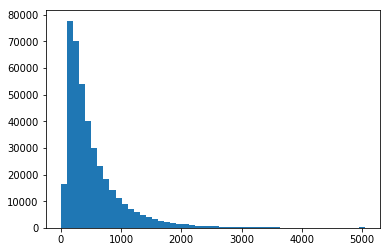

In [45]:
import matplotlib.pyplot as plt

plt.hist(x_df.txt_length, bins=50)

In [3]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(x_df.text, x_df.binary_stars, test_size=0.20, random_state=42)

In [4]:
#quick pipeline to show best performing nb

text_clf = Pipeline([('vect', CountVectorizer(stop_words='english', min_df=5, ngram_range=(1, 2))),
                     ('tfidf', TfidfTransformer()),  
                     ('clf', MultinomialNB()),
                    ])
text_clf = text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
np.mean(predicted == y_test)

# 92.68% CountVectorizer(stop_words='english', min_df=5, ngram_range=(1, 2))
# 94.67% w/ fit prior False
# 94.36% w/ alpha = 0.1

0.9268786162823692

In [5]:
from sklearn.model_selection import GridSearchCV
parameters = {
              'clf__alpha': (1e-1, 1e-2, 1e-3),
             }

gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(X_train, y_train)

In [5]:
from sklearn.model_selection import GridSearchCV
parameters = {'tfidf__use_idf': (True, False),
             }

gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(X_train, y_train)

In [8]:
gs_clf.best_score_
gs_clf.best_params_

{'clf__alpha': 0.1}

In [21]:
n=0
for i in range(len(predicted)):
    if predicted[i] != y_test.iloc[i]:
        n += 1
        print(predicted[i], y_test.iloc[i], X_test.iloc[i], '\n\n\n')
        if n > 10:
            break
        

1 0 Los meseros les gusta tips. So aqui tengo un tip. Yo ordene mi comida para comer ahi y hasta le dije a la cajera "esto va hacer para aqui" me dice "okay" me siento y llega la misma mesera y dice "sorry te lo hicieron para llevar" me dio la comida y se fue. Yo trabajo para dos restaurantes y cada ves que nos pasa esto a nosotros decimos "perdon, le voy a decir a un chef que ponga esto en un plato". Eso es mi tip para ustedes. Por eso no regresaré, por algo chico que muy fácilmente podían arreglar pero no les vale, ni me preguntan "todo bien?" "Lo quieres para aqui?" "Te lo arreglamos?" "Como esta la comida y su servicio?" ahora solo ire a TORTAS PAQUIME para comprar mis tortas... 



0 1 This is my dirty little secret. You can seriously eat your face off for a ridiculously small amount of money. It makes me wonder how they do it. It's a shameful feeling I get inside when I see that I have the highest sushi tower ... until I see it only cost me $12. I literally have never been able t

In [23]:
#quick pipeline to show best performing nb

text_clf = Pipeline([('vect', CountVectorizer(stop_words='english', min_df=5, ngram_range=(2, 2))),
                     ('tfidf', TfidfTransformer()),  
                     ('clf', MultinomialNB()),
                    ])
text_clf = text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
np.mean(predicted == y_test)

# % CountVectorizer(stop_words='english', min_df=5, ngram_range=(2, 2))

0.9264098103803496

In [7]:
#quick pipeline to show best performing svm

text_clf_svm = Pipeline([('vect', CountVectorizer(stop_words='english', min_df=5, ngram_range=(1, 2))),
                         ('tfidf', TfidfTransformer()), 
                         ('clf-svm', SGDClassifier(loss='modified_huber', class_weight = 'balanced', penalty='l2', alpha=1e-4, max_iter=5, random_state=42)),
                        ])

text_clf_svm = text_clf_svm.fit(X_train, y_train)
predicted_svm = text_clf_svm.predict(X_test)
np.mean(predicted_svm == y_test)

# 87.87% CountVectorizer(stop_words='english', min_df=5)
# 92.3% SGDCClassifier class_weight = 'balanced' loss='hinge'
# 93.3% SGDCClassifier class_weight = 'balanced' loss='modified_huber', alpha=1e-3
# 95.16% SGDCClassifier class_weight = 'balanced' loss='modified_huber', alpha=1e-4

MemoryError: 

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters_svm = {'clf-svm__alpha': (1, 0.1, 1e-2),
                 }
gs_clf_svm = GridSearchCV(text_clf_svm, parameters_svm, n_jobs=-1)
gs_clf_svm = gs_clf_svm.fit(X_train, y_train)


In [18]:
gs_clf_svm.get_params
# gs_clf_svm.best_params_

<bound method BaseEstimator.get_params of GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        ...ty='l2', power_t=0.5, random_state=42,
       shuffle=True, tol=None, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'clf-svm__alpha': (1, 0.1, 0.01)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)>

In [9]:
review_len = 0
count_r = 0
for i in range(len(predicted)):
    if predicted[i] != y_test.iloc[i]:
        review_len += len(X_test.iloc[i].split())
        count_r += 1
        
print(review_len/count_r)
        

121.29207232267038


In [10]:
review_len = 0
count_r = 0
for i in range(len(predicted)):
    if predicted_svm[i] != y_test.iloc[i]:
        review_len += len(X_test.iloc[i].split())
        count_r += 1
        
print(review_len/count_r)

117.2257077276205


In [16]:
review_len = []
for i in range(len(predicted)):
    if predicted[i] != y_test.iloc[i]:
        review_len.append(len(X_test.iloc[i].split()))

        

In [21]:
svm_review_len = []
for i in range(len(predicted)):
    if predicted_svm[i] != y_test.iloc[i]:
        svm_review_len.append(len(X_test.iloc[i].split()))


In [25]:
np.min(review_len)

1

In [26]:
np.min(svm_review_len)

1

In [15]:
review_len = 0
count_r = 0
for i in range(len(predicted)):
    review_len += len(X_test.iloc[i].split())
    count_r += 1
        
print(review_len/count_r)

98.72020923547628


In [49]:
nb_pred_prob = text_clf.predict_proba(X_test)
svm_pred_prob = text_clf_svm.predict_proba(X_test)

In [50]:
print(nb_pred_prob[0])
print(max(nb_pred_prob[0]))
print(predicted[0])
print(svm_pred_prob[0])
print(max(svm_pred_prob[0]))
print(predicted_svm[0])

[0.25970701 0.74029299]
0.7402929904746972
1
[0.47710346 0.52289654]
0.5228965426053269
1


In [7]:
nb_pred_prob = text_clf.predict_proba(X_test)
svm_pred_prob = text_clf_svm.predict_proba(X_test)

best_pred = []
for i in range(len(predicted)):
    if max(svm_pred_prob[i]) > max(nb_pred_prob[i]):
        best_pred.append(predicted_svm[i])
    else:
        best_pred.append(predicted[i])



In [8]:
np.mean(best_pred == y_test)


0.9541803915762982

In [25]:
n=0
# while n<5:
for i in range(len(predicted_svm)):
    if predicted_svm[i] != y_test.iloc[i]:
        n += 1
        print(predicted_svm[i], y_test.iloc[i], X_test.iloc[i], '\n\n\n')
        if n > 10:
            break

0 1 We've have been looking for a favorite Mexican restaurant since moving to AZ.  One visit and this place looks promising.  We went on a busy Friday night.  Had to wait a while and as we spoke with the other people waiting, they were all long time patrons.  Another very promising sign.  We were seated in the bar at a cozy booth and were served drinks, chips and salsa with beans right away.  We ordered and the food arrived pretty quickly.  We never had to ask for refills, the drinks just kept being refilled and they checked back often to see if we needed anything.  It was a great service experience and the food was very good. 



1 0 Los meseros les gusta tips. So aqui tengo un tip. Yo ordene mi comida para comer ahi y hasta le dije a la cajera "esto va hacer para aqui" me dice "okay" me siento y llega la misma mesera y dice "sorry te lo hicieron para llevar" me dio la comida y se fue. Yo trabajo para dos restaurantes y cada ves que nos pasa esto a nosotros decimos "perdon, le voy a d

In [31]:
from sklearn.metrics import f1_score

print(f1_score(y_test, predicted, average='weighted'))
print(f1_score(y_test, predicted_svm, average='weighted'))

0.9466540787752862
0.9246250027519819


In [25]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print(f1_score(y_test, predicted, average="macro"))
print(precision_score(y_test, predicted, average="macro"))
print(recall_score(y_test, predicted, average="macro"))

0.8911035931036251
0.9364841597319095
0.8611040694807633


In [32]:
from sklearn.metrics import precision_recall_fscore_support as score


precision, recall, fscore, support = score(y_test, predicted, average='weighted')

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: 0.9465571766600978
recall: 0.9467781931233576
fscore: 0.9466540787752862
support: None


In [33]:
precision, recall, fscore, support = score(y_test, predicted_svm, average='weighted')

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: 0.9284852620743609
recall: 0.9230664840791049
fscore: 0.9246250027519819
support: None


In [57]:
precision, recall, fscore, support = score(y_test, best_pred, average='weighted')

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: 0.9487485860224252
recall: 0.9483449917958967
fscore: 0.9485177491432579
support: None


In [34]:
precision, recall, fscore, support = score(y_test, predicted_svm)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.80171024 0.96922736]
recall: [0.90833925 0.92779942]
fscore: [0.85170036 0.94806103]
support: [19714 61343]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tvec = TfidfVectorizer(max_features=100000,ngram_range=(1, 3))
x_train_tfidf = tvec.fit_transform(X_train)

In [ ]:

def batch_generator(X_data, y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(y_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch,:].toarray()
        y_batch = y_data[y_data.index[index_batch]]
        counter += 1
        yield X_batch,y_batch
        if (counter > number_of_batches):
            counter=0
            
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=100000))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
                    epochs=5, validation_data=(X_test, y_test),
                    steps_per_epoch=x_train_tfidf.shape[0]/32)
